In [4]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt
import numpy as np

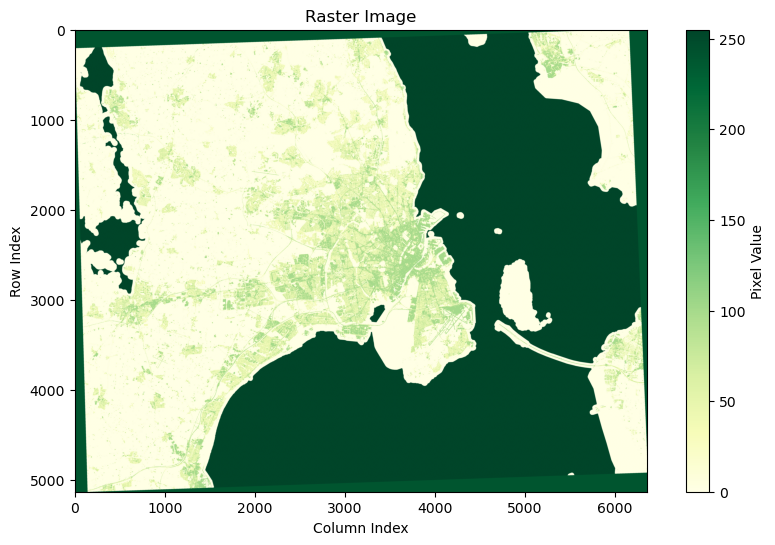

In [2]:
# open imp raw data
imp = rasterio.open('imp2018/IMD_2018_010m_03035_V2_0.tif') 

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(imp.read(1).astype('float64'), cmap='YlGn')  
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

In [7]:
input_path = "imp2018/IMD_2018_010m_03035_V2_0.tif"
template_path = "landsat20180603/lst_case.tif"
output_path = "imp2018/imp2018.tif"

with rasterio.open(input_path) as src_input, rasterio.open(template_path) as src_template:

    dst_crs = src_template.crs  # EPSG:25832

    transform, width, height = calculate_default_transform(
        src_input.crs,
        dst_crs,
        src_input.width,
        src_input.height,
        *src_input.bounds
    )

    kwargs = src_input.meta.copy()
    kwargs.update({
        "crs": dst_crs,
        "transform": transform,
        "width": width,
        "height": height
    })

    with rasterio.open(output_path, "w", **kwargs) as dst:
        for i in range(1, src_input.count + 1):
            reproject(
                source=rasterio.band(src_input, i),
                destination=rasterio.band(dst, i),
                src_transform=src_input.transform,
                src_crs=src_input.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest
            )


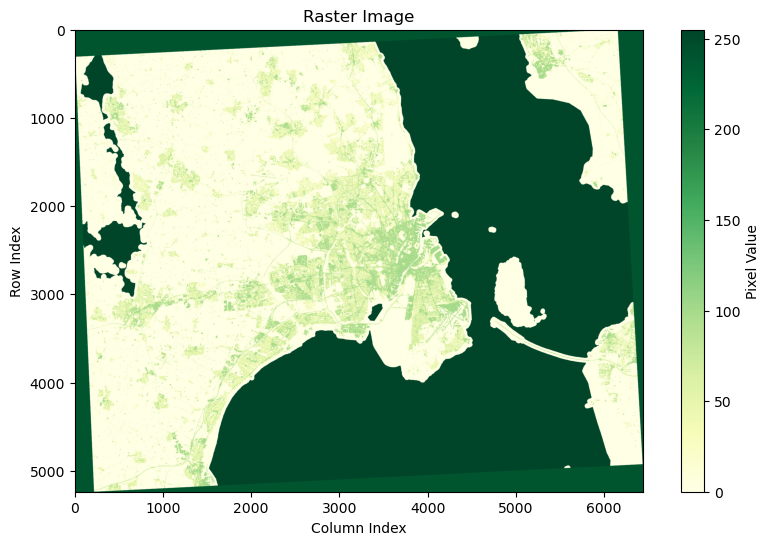

In [8]:
input_path = "imp2018/IMD_2018_010m_03035_V2_0.tif"
template_path = "landsat20180603/lst_case.tif"
output_path = "imp2018/imp2018.tif"

with rasterio.open(input_path) as src, rasterio.open(template_path) as tpl:

    kwargs = tpl.meta.copy()
    kwargs.update({
        "count": src.count,
        "dtype": "float32",        # important for averaging
        "nodata": src.nodata
    })

    with rasterio.open(output_path, "w", **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=tpl.transform,
                dst_crs=tpl.crs,
                resampling=Resampling.average
            )


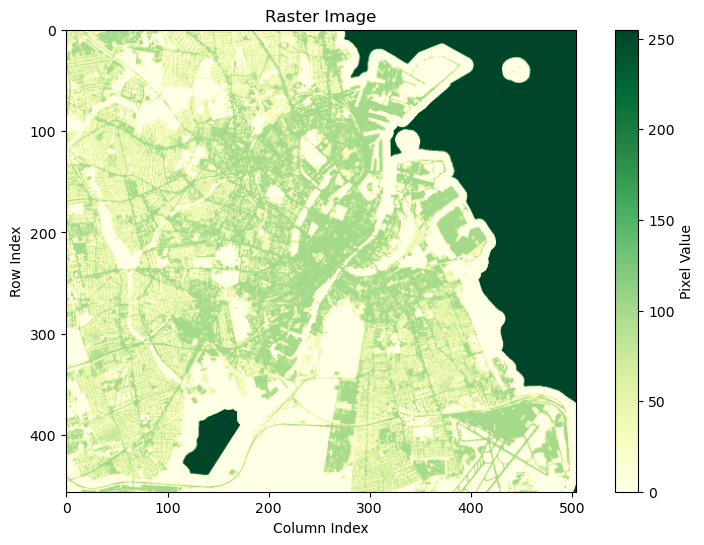

In [10]:
# open imp raw data
imp = rasterio.open('imp2018/imp2018.tif') 

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(imp.read(1).astype('float64'), cmap='YlGn')  
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()